In [17]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [18]:
nx, L, nu, sigma, nt= 41, 2.0, 0.3, 0.2, 20
dx= L / (nx-1)
dt = sigma *dx**2/nu

x= numpy.linspace (0.0, L, num=nx)

In [22]:
u0 = numpy.ones(nx)
mask = numpy.where (numpy.logical_and( x>=0.5, x<=1.0))
u0[mask] = 2.0

print (u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:
u = u0.copy()
for n in range (nt):
    u[1:-1] = u[1:-1] + nu*dt/ dx**2 * (u[2:] - 2* u[1:-1]  + u[:-2])

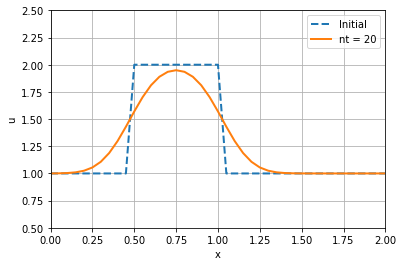

In [23]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial',
            color='C0', linestyle='--', linewidth=2)
pyplot.plot(x, u, label='nt = {}'.format(nt),
            color='C1', linestyle='-', linewidth=2)
pyplot.legend(loc='upper right')
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5);

In [34]:
def diffusion (u0, sigma=0.5, nt=20):
    u_hist = [u0.copy()]
    u=u0.copy()
    for n in range(nt):
        u[1:-1] = u[1:-1] + sigma * (u[2:] - 2*u[1:-1]+ u[:-2])
        u_hist.append (u.copy())
    return u_hist

In [35]:
u_hist = diffusion(u0, sigma=sigma, nt=nt)

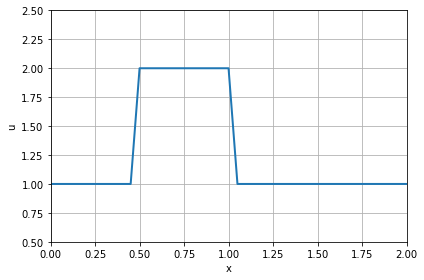

In [36]:
fig = pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
line = pyplot.plot(x, u0,
                   color='C0', linestyle='-', linewidth=2)[0]
pyplot.xlim(0.0, L)
pyplot.ylim(0.5, 2.5)
fig.tight_layout()